In [58]:
import os
from pydub import AudioSegment


# src = "Data/Hades/01 No Escape.mp3"
# dst = "data_wav/Hades/delete.wav"

# # convert flacs to wav:                                                            
# sound = AudioSegment.from_mp3(src)
# sound.export(dst, format="wav")

<_io.BufferedRandom name='data_wav/Hades/delete'>

In [77]:
# Transforms a flac or mp3 into wav file, and cuts each track to 30 seconds.
for folder in os.listdir("Data"):
    if folder == ".DS_Store":
        pass
    else:
        for filename in os.listdir('Data' + '/' + folder):
            if filename == '.DS_Store':
                pass
            else:
                format_song = filename[-3:]
                src = "Data" + "/" + folder + "/" + filename
                dst = "data_wav/"  + "/" + folder + "/" + filename[:-4]

                if format_song == 'mp3': # most folders are in .mp3 format
                    sound = AudioSegment.from_mp3(src)
                    sound = sound[0:30000] # get the first 30 secs of each track
                    sound.export(dst+'.wav', format="wav")
                else: # I have one folder with .flac 
                    sound = AudioSegment.from_file(src)
                    sound = sound[0:30000]
                    sound.export(dst+'wav', format="wav")       

In [85]:
from sklearn.model_selection import train_test_split
import json
import librosa
import numpy as np
import math

DATA_SET_PATH = "data_wav"
JSN_PATH = "data.json"

SAMPLE_RATE = 22050
DUR = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * DUR

def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split('/')
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            print("\nprocessing {}".format(semantic_label))

            for f in filenames:
                if f == '.DS_Store':
                    pass
                else:
                    file_path = os.path.join(dirpath, f)
                    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
                    for s in range(num_segments):
                        start_sample = num_samples_per_segment * s
                        finish_sample = start_sample + num_samples_per_segment
                        
                        mfcc = librosa.feature.mfcc(signal[start_sample: finish_sample]
                                                    ,sr=sr,
                                                    n_fft = n_fft,
                                                    n_mfcc = n_mfcc,
                                                    hop_length = hop_length)
                        mfcc = mfcc.T
                        
                        if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                        
                        
                        print("{}, segment:{}".format(file_path, s+1))
                    
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


In [86]:
save_mfcc(DATA_SET_PATH, JSN_PATH, num_segments=10)


processing zelda
data_wav/zelda/06 Eric Buchholz - Princess Zelda.wav, segment:1
data_wav/zelda/06 Eric Buchholz - Princess Zelda.wav, segment:2
data_wav/zelda/06 Eric Buchholz - Princess Zelda.wav, segment:3
data_wav/zelda/06 Eric Buchholz - Princess Zelda.wav, segment:4
data_wav/zelda/06 Eric Buchholz - Princess Zelda.wav, segment:5
data_wav/zelda/06 Eric Buchholz - Princess Zelda.wav, segment:6
data_wav/zelda/06 Eric Buchholz - Princess Zelda.wav, segment:7
data_wav/zelda/06 Eric Buchholz - Princess Zelda.wav, segment:8
data_wav/zelda/06 Eric Buchholz - Princess Zelda.wav, segment:9
data_wav/zelda/06 Eric Buchholz - Princess Zelda.wav, segment:10
data_wav/zelda/02 Eric Buchholz - The Man with Evil Eyes.wav, segment:1
data_wav/zelda/02 Eric Buchholz - The Man with Evil Eyes.wav, segment:2
data_wav/zelda/02 Eric Buchholz - The Man with Evil Eyes.wav, segment:3
data_wav/zelda/02 Eric Buchholz - The Man with Evil Eyes.wav, segment:4
data_wav/zelda/02 Eric Buchholz - The Man with Evil E

data_wav/P5/17. Last Surprise.wav, segment:1
data_wav/P5/17. Last Surprise.wav, segment:2
data_wav/P5/17. Last Surprise.wav, segment:3
data_wav/P5/17. Last Surprise.wav, segment:4
data_wav/P5/17. Last Surprise.wav, segment:5
data_wav/P5/17. Last Surprise.wav, segment:6
data_wav/P5/17. Last Surprise.wav, segment:7
data_wav/P5/17. Last Surprise.wav, segment:8
data_wav/P5/17. Last Surprise.wav, segment:9
data_wav/P5/17. Last Surprise.wav, segment:10
data_wav/P5/08. The Poem of Everyone’s Souls.wav, segment:1
data_wav/P5/08. The Poem of Everyone’s Souls.wav, segment:2
data_wav/P5/08. The Poem of Everyone’s Souls.wav, segment:3
data_wav/P5/08. The Poem of Everyone’s Souls.wav, segment:4
data_wav/P5/08. The Poem of Everyone’s Souls.wav, segment:5
data_wav/P5/08. The Poem of Everyone’s Souls.wav, segment:6
data_wav/P5/08. The Poem of Everyone’s Souls.wav, segment:7
data_wav/P5/08. The Poem of Everyone’s Souls.wav, segment:8
data_wav/P5/08. The Poem of Everyone’s Souls.wav, segment:9
data_wav/

data_wav/HollowKnight/06. Hornet.wav, segment:1
data_wav/HollowKnight/06. Hornet.wav, segment:2
data_wav/HollowKnight/06. Hornet.wav, segment:3
data_wav/HollowKnight/06. Hornet.wav, segment:4
data_wav/HollowKnight/06. Hornet.wav, segment:5
data_wav/HollowKnight/06. Hornet.wav, segment:6
data_wav/HollowKnight/06. Hornet.wav, segment:7
data_wav/HollowKnight/06. Hornet.wav, segment:8
data_wav/HollowKnight/06. Hornet.wav, segment:9
data_wav/HollowKnight/06. Hornet.wav, segment:10
data_wav/HollowKnight/07. Reflection.wav, segment:1
data_wav/HollowKnight/07. Reflection.wav, segment:2
data_wav/HollowKnight/07. Reflection.wav, segment:3
data_wav/HollowKnight/07. Reflection.wav, segment:4
data_wav/HollowKnight/07. Reflection.wav, segment:5
data_wav/HollowKnight/07. Reflection.wav, segment:6
data_wav/HollowKnight/07. Reflection.wav, segment:7
data_wav/HollowKnight/07. Reflection.wav, segment:8
data_wav/HollowKnight/07. Reflection.wav, segment:9
data_wav/HollowKnight/07. Reflection.wav, segment:1

data_wav/Witcher/02. Fanfares And Flowers.wav, segment:1
data_wav/Witcher/02. Fanfares And Flowers.wav, segment:2
data_wav/Witcher/02. Fanfares And Flowers.wav, segment:3
data_wav/Witcher/02. Fanfares And Flowers.wav, segment:4
data_wav/Witcher/02. Fanfares And Flowers.wav, segment:5
data_wav/Witcher/02. Fanfares And Flowers.wav, segment:6
data_wav/Witcher/02. Fanfares And Flowers.wav, segment:7
data_wav/Witcher/02. Fanfares And Flowers.wav, segment:8
data_wav/Witcher/02. Fanfares And Flowers.wav, segment:9
data_wav/Witcher/02. Fanfares And Flowers.wav, segment:10
data_wav/Witcher/08. Wine Wars.wav, segment:1
data_wav/Witcher/08. Wine Wars.wav, segment:2
data_wav/Witcher/08. Wine Wars.wav, segment:3
data_wav/Witcher/08. Wine Wars.wav, segment:4
data_wav/Witcher/08. Wine Wars.wav, segment:5
data_wav/Witcher/08. Wine Wars.wav, segment:6
data_wav/Witcher/08. Wine Wars.wav, segment:7
data_wav/Witcher/08. Wine Wars.wav, segment:8
data_wav/Witcher/08. Wine Wars.wav, segment:9
data_wav/Witche

data_wav/KingdomHearts/1-06. Bustin' Up on the Beach.wav, segment:10
data_wav/KingdomHearts/1-09. Strange Whispers.wav, segment:1
data_wav/KingdomHearts/1-09. Strange Whispers.wav, segment:2
data_wav/KingdomHearts/1-09. Strange Whispers.wav, segment:3
data_wav/KingdomHearts/1-09. Strange Whispers.wav, segment:4
data_wav/KingdomHearts/1-09. Strange Whispers.wav, segment:5
data_wav/KingdomHearts/1-09. Strange Whispers.wav, segment:6
data_wav/KingdomHearts/1-09. Strange Whispers.wav, segment:7
data_wav/KingdomHearts/1-09. Strange Whispers.wav, segment:8
data_wav/KingdomHearts/1-09. Strange Whispers.wav, segment:9
data_wav/KingdomHearts/1-09. Strange Whispers.wav, segment:10


In [280]:
# now can finally use the data for classification

# loading the data:

def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"]) 
    return inputs, targets

inputs, targets = load_data('data.json')

In [281]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

X_train, X_test, y_train, y_test  =  train_test_split(inputs, targets, test_size = 0.3)

model = keras.Sequential([
    #input
    keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    #1st hidden layer
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    
    # output:
    keras.layers.Dense(6, activation='softmax')
])

# compile
lr = .001
optimizer = keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics =["accuracy"])
model.summary()


Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_68 (Flatten)         (None, 1690)              0         
_________________________________________________________________
dense_236 (Dense)            (None, 512)               865792    
_________________________________________________________________
dense_237 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_238 (Dense)            (None, 64)                16448     
_________________________________________________________________
dense_239 (Dense)            (None, 6)                 390       
Total params: 1,013,958
Trainable params: 1,013,958
Non-trainable params: 0
_________________________________________________________________


In [320]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50,batch_size=32)



Epoch 1/100
14/14 [==============================] - 0s 21ms/step - loss: 36.7829 - accuracy: 0.9357 - val_loss: 43.3830 - val_accuracy: 0.5889
Epoch 2/100
14/14 [==============================] - 0s 14ms/step - loss: 36.5433 - accuracy: 0.9548 - val_loss: 44.4124 - val_accuracy: 0.5167
Epoch 3/100
14/14 [==============================] - 0s 14ms/step - loss: 36.5238 - accuracy: 0.9310 - val_loss: 42.6634 - val_accuracy: 0.5667
Epoch 4/100
14/14 [==============================] - 0s 14ms/step - loss: 36.2119 - accuracy: 0.9476 - val_loss: 43.8957 - val_accuracy: 0.5222
Epoch 5/100
14/14 [==============================] - 0s 13ms/step - loss: 35.9081 - accuracy: 0.9690 - val_loss: 42.7651 - val_accuracy: 0.5611
Epoch 6/100
14/14 [==============================] - 0s 13ms/step - loss: 35.7640 - accuracy: 0.9738 - val_loss: 42.4131 - val_accuracy: 0.5333
Epoch 7/100
14/14 [==============================] - 0s 14ms/step - loss: 35.5582 - accuracy: 0.9833 - val_loss: 43.3894 - val_accuracy:

14/14 [==============================] - 0s 16ms/step - loss: 29.3771 - accuracy: 1.0000 - val_loss: 35.7803 - val_accuracy: 0.5389
Epoch 58/100
14/14 [==============================] - 0s 14ms/step - loss: 29.2605 - accuracy: 1.0000 - val_loss: 35.6587 - val_accuracy: 0.5389
Epoch 59/100
14/14 [==============================] - 0s 16ms/step - loss: 29.1441 - accuracy: 1.0000 - val_loss: 35.5408 - val_accuracy: 0.5389
Epoch 60/100
14/14 [==============================] - 0s 13ms/step - loss: 29.0278 - accuracy: 1.0000 - val_loss: 35.4209 - val_accuracy: 0.5389
Epoch 61/100
14/14 [==============================] - 0s 13ms/step - loss: 28.9117 - accuracy: 1.0000 - val_loss: 35.3027 - val_accuracy: 0.5333
Epoch 62/100
14/14 [==============================] - 0s 13ms/step - loss: 28.7956 - accuracy: 1.0000 - val_loss: 35.1845 - val_accuracy: 0.5333
Epoch 63/100
14/14 [==============================] - 0s 13ms/step - loss: 28.6798 - accuracy: 1.0000 - val_loss: 35.0656 - val_accuracy: 0.533

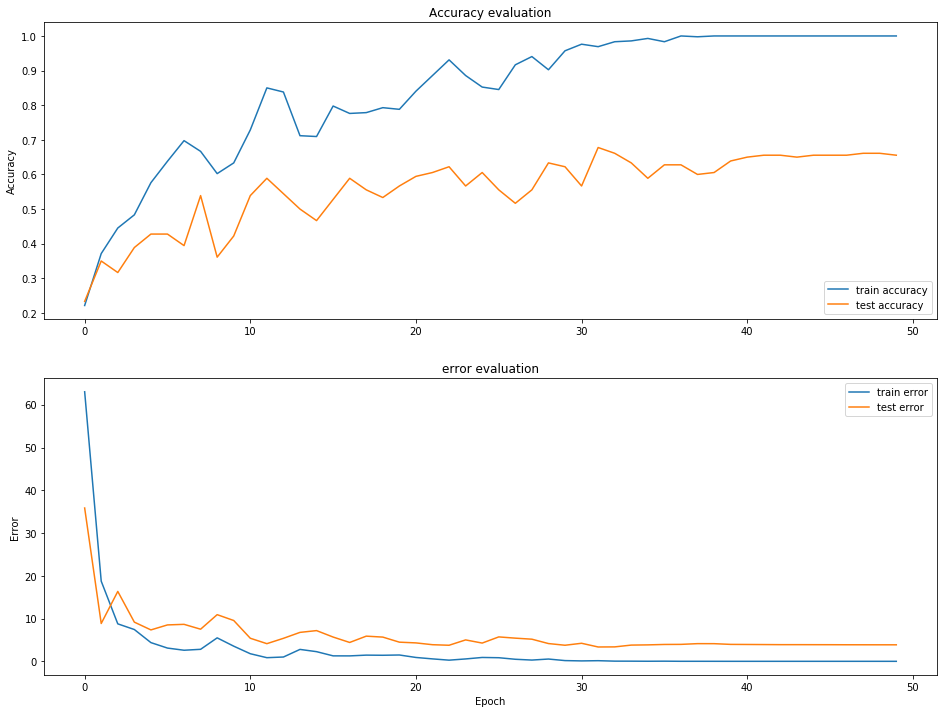

In [283]:
# model is overfitting. 
import matplotlib.pyplot as plt

def plot_history(history):
    plt.rcParams['figure.figsize'] = [16, 12]
    fig, axs = plt.subplots(2,1)
    # accuracy subplots:
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc='lower right')
    axs[0].set_title("Accuracy evaluation")
    
    #error subplots
    axs[1].plot(history.history["loss"], label = "train error")
    axs[1].plot(history.history["val_loss"], label = "test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc='upper right')
    axs[1].set_title("error evaluation")
    
    plt.show()
    
plot_history(history)

In [498]:
# Applying Dropout and regularizatoin type l2 to reduce overfitting
model = keras.Sequential([
    #input
    keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    
    keras.layers.Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l1(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l1(0.001)),
    keras.layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l1(0.001)),
    
    # output:
    keras.layers.Dense(6, activation='softmax' ) # want to have an output similar to a categorical probability distribution 
])

# compile
lr = .001
#optimizer = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
optimizer = keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics =["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100,batch_size=32)

Epoch 1/100
14/14 [==============================] - 1s 21ms/step - loss: 128.4062 - accuracy: 0.2019 - val_loss: 87.5469 - val_accuracy: 0.1667
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 64.5814 - accuracy: 0.2901 - val_loss: 52.6516 - val_accuracy: 0.2667
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 46.9795 - accuracy: 0.3645 - val_loss: 34.0462 - val_accuracy: 0.3333
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 35.5198 - accuracy: 0.4086 - val_loss: 38.0090 - val_accuracy: 0.3889
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 33.6413 - accuracy: 0.4608 - val_loss: 35.3634 - val_accuracy: 0.4056
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 30.1067 - accuracy: 0.5332 - val_loss: 28.7808 - val_accuracy: 0.4444
Epoch 7/100
14/14 [==============================] - 0s 9ms/step - loss: 27.3258 - accuracy: 0.5940 - val_loss: 27.2243 - val_accuracy: 0.4

Epoch 58/100
14/14 [==============================] - 0s 8ms/step - loss: 9.5008 - accuracy: 0.8920 - val_loss: 11.1547 - val_accuracy: 0.5778
Epoch 59/100
14/14 [==============================] - 0s 8ms/step - loss: 9.3540 - accuracy: 0.9136 - val_loss: 10.9613 - val_accuracy: 0.6000
Epoch 60/100
14/14 [==============================] - 0s 9ms/step - loss: 9.1064 - accuracy: 0.9269 - val_loss: 10.7588 - val_accuracy: 0.5944
Epoch 61/100
14/14 [==============================] - 0s 10ms/step - loss: 9.0084 - accuracy: 0.9371 - val_loss: 11.3223 - val_accuracy: 0.5167
Epoch 62/100
14/14 [==============================] - 0s 9ms/step - loss: 9.1009 - accuracy: 0.9004 - val_loss: 10.4407 - val_accuracy: 0.5722
Epoch 63/100
14/14 [==============================] - 0s 8ms/step - loss: 8.8518 - accuracy: 0.9077 - val_loss: 10.1628 - val_accuracy: 0.6389
Epoch 64/100
14/14 [==============================] - 0s 10ms/step - loss: 8.6423 - accuracy: 0.9537 - val_loss: 10.3822 - val_accuracy: 0.59

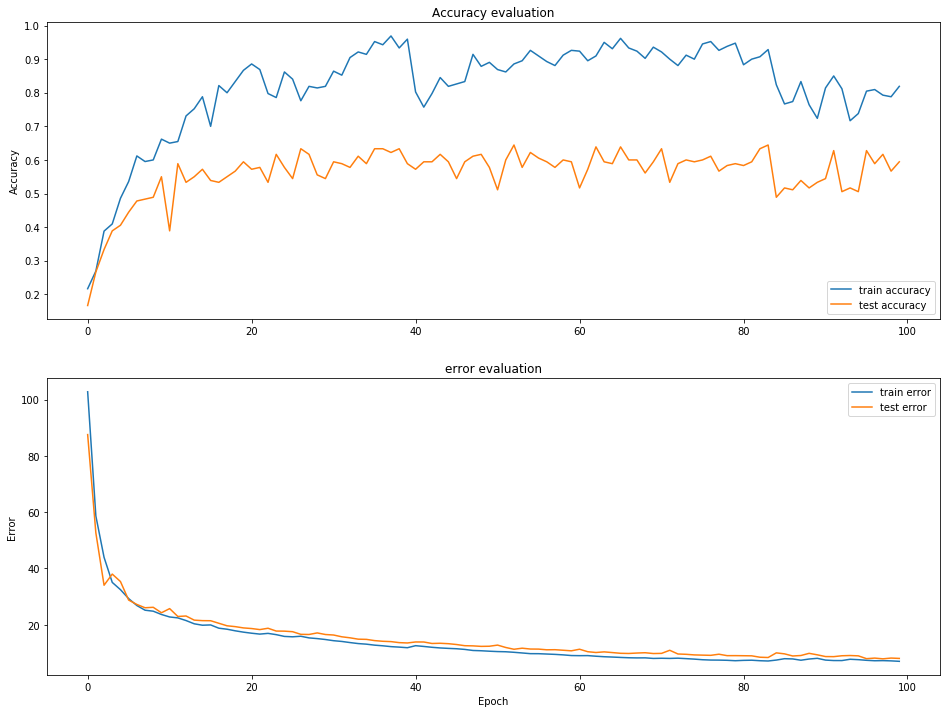

In [499]:
plot_history(history)

# Getting to 0.59 accuracy using a confusion matrix

In [500]:
pred = model.predict(X_test)
pred.shape

(180, 6)

In [501]:
pred[0]

array([3.4151792e-14, 1.0000000e+00, 2.0472195e-18, 4.5555370e-20,
       2.5763600e-21, 8.9727548e-19], dtype=float32)

In [503]:
np.sum(pred[0]) # as expected. 

1.0

In [502]:
pred[100]

array([0.607713  , 0.0116409 , 0.00112527, 0.00205325, 0.00061697,
       0.37685066], dtype=float32)

In [506]:
pred

array([[3.4151792e-14, 1.0000000e+00, 2.0472195e-18, 4.5555370e-20,
        2.5763600e-21, 8.9727548e-19],
       [6.0912275e-01, 2.7440576e-02, 2.5318190e-03, 4.5093658e-04,
        1.9005020e-04, 3.6026400e-01],
       [5.6709224e-01, 2.6354319e-01, 1.2785769e-03, 4.5964159e-03,
        4.9982704e-03, 1.5849124e-01],
       ...,
       [1.5905304e-01, 1.5596198e-03, 1.2554997e-02, 1.6189511e-01,
        1.1468690e-02, 6.5346849e-01],
       [5.3448111e-01, 2.1690118e-01, 1.1270663e-03, 2.1692601e-01,
        7.9232464e-03, 2.2641433e-02],
       [4.3979144e-05, 9.9595177e-01, 1.7987934e-03, 3.0591199e-04,
        1.8776635e-03, 2.1810532e-05]], dtype=float32)

In [543]:
# sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
from sklearn.metrics import confusion_matrix
c = np.array([])
for i in pred:
    y_predicted = np.argmax(i)
    c = np.append(c,y_predicted)
    
    
print( c.shape )
print( y_test.shape)

(180,)
(180,)


In [551]:
confusion_mat = confusion_matrix(y_test, c)
confusion_mat

array([[10,  6,  1,  5,  0,  3],
       [ 3, 25,  2,  1,  3,  0],
       [ 1,  4, 16,  5,  2,  1],
       [ 1,  0,  1, 23,  0,  4],
       [ 6,  4,  4,  4, 11,  3],
       [ 3,  2,  3,  1,  0, 22]])

In [558]:
# accuracy of model:
sum( np.diag(confusion_mat) ) / sum( sum(confusion_mat) ) 

0.5944444444444444